In [2]:
# swarm inteligence - inteligencija grupa
# PSO - particle swarm optimization

# swarm = [Particle() ...]
# while not stop_condition():
#     for particle in swarm:
#         r_l, r_g ~ U(0,1)
#         izracunaj novu brzinu v = c_i * v + r_l*c_l*lokalno + r_g*c_g*globalno
#         izracunaj novu poziciju p = p + v
# resenje = globalno

In [27]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [57]:
def rastrigin(x):
    A = 10
    n = len(x)
    return A*n + sum(x_i**2 - A*np.cos(2*np.pi*x_i) for x_i in x)

In [58]:
def rosenbrock(x):
    a = 1
    b = 100
    return (a - x[0]) ** 2 + b * (x[1] - x[0]**2)**2

In [59]:
bounds = [(-5.12, 5.12), (-5.12, 5.12)]

In [67]:
class Particle:
    
    globalBestPosition = None
    globalBestValue = None
    
    def __init__(self, bounds, obj_func, c_i, c_l, c_g):
        self.position = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])
        self.velocity = np.array([random.uniform(-(bound[1] - bound[0]),
                                                 bound[1] - bound[0]) for bound in bounds])
        self.bestPosition = np.array(self.position)
        self.currValue = obj_func(self.position)
        self.bestValue = self.currValue
        if Particle.globalBestValue is None or self.currValue < Particle.globalBestValue:
            Particle.globalBestPosition = self.position.copy()
            Particle.globalBestValue = self.currValue
        
        self.bounds = bounds
        self.obj_func = obj_func
        self.c_i = c_i
        self.c_l = c_l
        self.c_g = c_g
        
    def updatePosition(self):
        lower_bounds = np.array([x[0] for x in self.bounds])
        upper_bounds = np.array([x[1] for x in self.bounds])
        self.position = np.clip(self.position + self.velocity, lower_bounds, upper_bounds)
#         for i in range(len(self.position)):
#             self.position[i] = self.position[i] + self.velocity[i]
#             if self.position[i] < self.bounds[i][0]:
#                 self.position[i] = self.bounds[i][0]
#             elif self.position[i] > self.bounds[i][1]:
#                 self.position[i] = self.bounds[i][1]
    
        self.currValue = self.obj_func(self.position)
        if self.bestValue > self.currValue:
            self.bestValue = self.currValue
            self.bestPosition = self.position.copy()
            if Particle.globalBestValue > self.currValue:
                Particle.globalBestValue = self.currValue
                Particle.globalBestPosition = self.position.copy()
        
    def updateVelocity(self):
#         r_l = random.random()
#         r_g = random.random()
        # random broj za svaku dimenziju
        r_l = np.random.random(self.velocity.shape)
        r_g = np.random.random(self.velocity.shape)
        self.velocity = (self.c_i * self.velocity
                      + r_l * self.c_l * (self.bestPosition - self.position) # cognitive velocity
                      + r_g * self.c_g * (Particle.globalBestPosition - self.position)) # social velocity

Solution: [1. 1.], value: 4.6310338285984024e-26


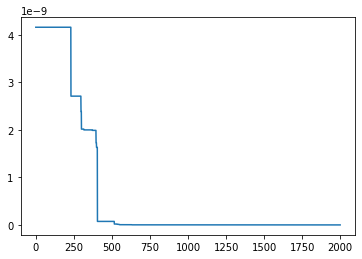

In [70]:
SWARM_SIZE = 50
MAX_ITER = 2000

swarm = [Particle(bounds, rosenbrock, 0.75, 2, 2) for _ in range(SWARM_SIZE)]
bestValues = []
for i in range(MAX_ITER):
    for j, particle in enumerate(swarm):
        particle.updateVelocity()
        particle.updatePosition()
        
    bestValues.append(Particle.globalBestValue)
    
print(f'Solution: {Particle.globalBestPosition}, value: {Particle.globalBestValue}')
plt.plot(range(MAX_ITER), bestValues)